In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
list=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
def binary_value(x):
    return x.map({'yes':1, 'no':0})
df[list] = df[list].apply(binary_value)
#or
#dataset['Gender'].unique()
#dataset['Gender']=dataset['Gender'].map({'F':0,'M':1})

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

In [14]:
status = pd.get_dummies(df["furnishingstatus"])
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [16]:
df.drop(['furnishingstatus'], axis =1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [17]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


In [22]:
num_var=['area', 'bedrooms', 'bathrooms', 'price']
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,0.169697,0.155227,0.4,0.0,1,1,0,0,0,0,1,0
19,0.615152,0.403379,0.4,0.5,2,1,0,0,0,1,1,1
159,0.321212,0.115628,0.4,0.5,1,1,1,1,0,1,0,0
35,0.548133,0.454417,0.4,0.5,4,1,0,0,0,1,2,0
28,0.575758,0.538015,0.8,0.5,2,1,0,1,1,0,2,0


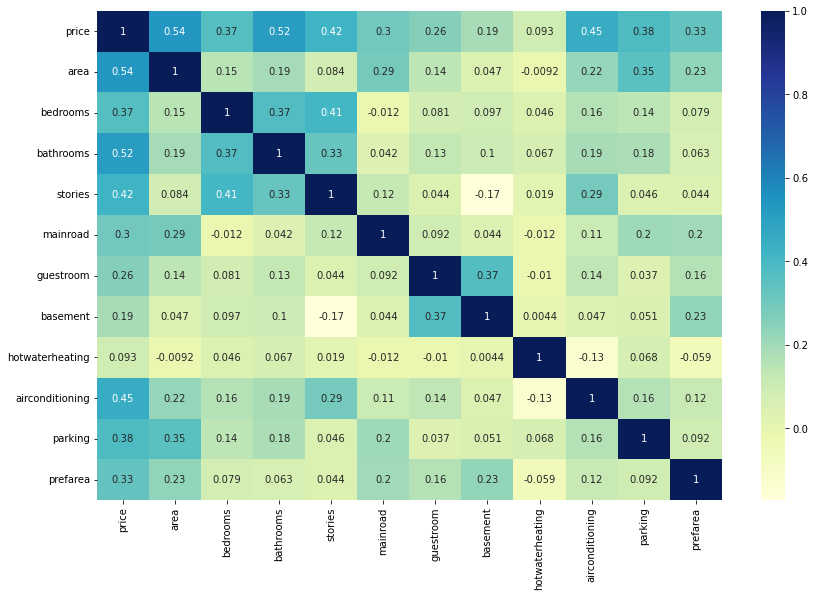

In [23]:
plt.figure(figsize = (14,9))
sns.heatmap(df.corr(), annot = True, cmap ="YlGnBu")
plt.show()

In [24]:
x= df[['area', 'bedrooms', 'bathrooms']]
y= df['price']

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42) 

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 3)
(109, 3)
(436,)
(109,)


In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = reg.predict(x_test)
y_pred

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527607, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801447,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154444, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693418,

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
r2score =r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("R-squared:", r2score)
print("mean_squared_error:", mse)

R-squared: 0.45592991188724474
mean_squared_error: 2750040479309.0513


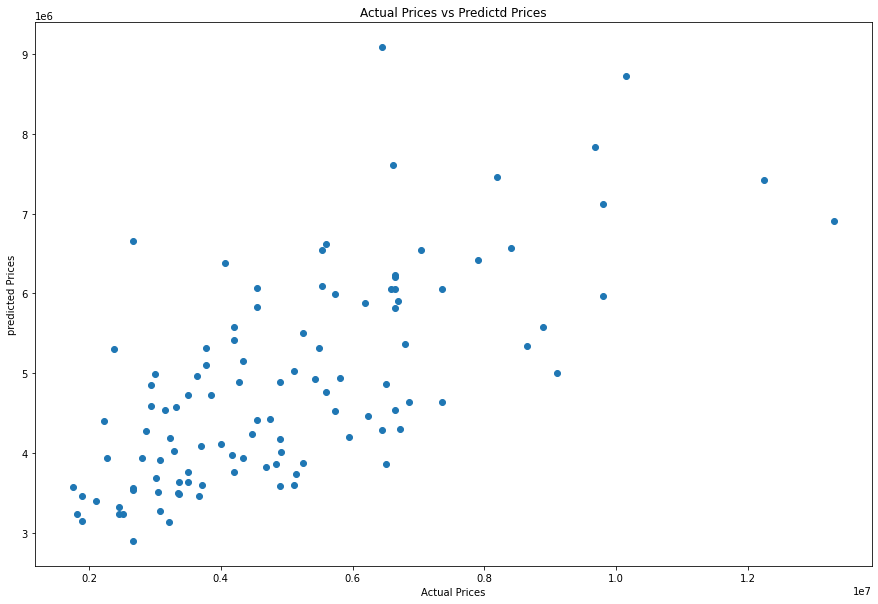

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.title("Actual Prices vs Predictd Prices")
plt.xlabel('Actual Prices')
plt.ylabel('predicted Prices')
plt.show()

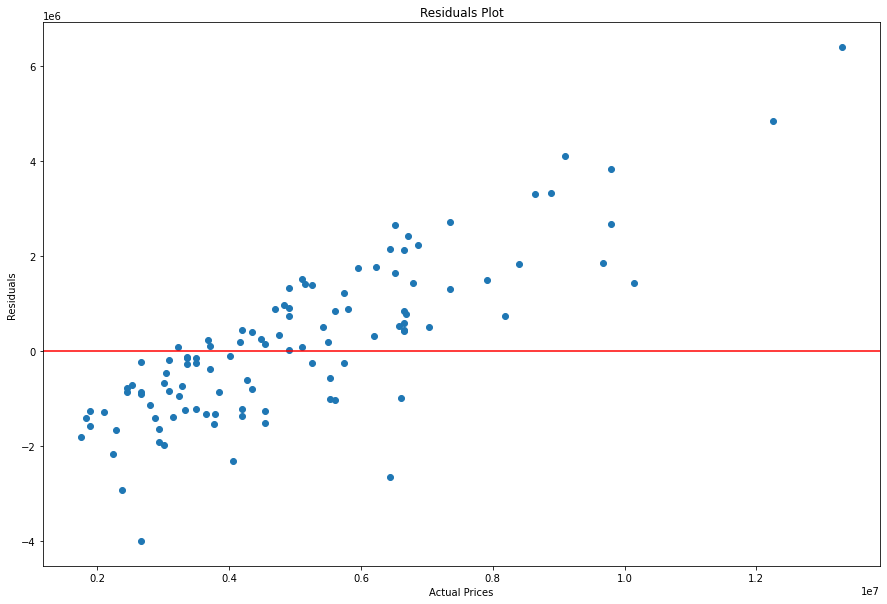

In [35]:
plt.figure(figsize=(15,10))
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y =0, color = 'red', linestyle="-")
plt.title("Residuals Plot")
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

In [51]:
new_data =[[4, 2, 4000]]
predicted_price = reg.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 17093956045.108274
